<a href="https://colab.research.google.com/github/AREEBA-art552/iris-flower-classification/blob/main/car_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [3]:
import zipfile

with zipfile.ZipFile("archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
import os
print(os.listdir())


['.config', 'car data.csv', 'archive (3).zip', 'sample_data']


In [9]:
import pandas as pd

df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# STEP 1: Load again if needed
df = pd.read_csv("car data.csv")

# STEP 2: Drop Car_Name column (naam ka koi ML use nahi)
df = df.drop(['Car_Name'], axis=1)

# STEP 3: Convert categorical columns to numbers using get_dummies
df = pd.get_dummies(df, drop_first=True)

# STEP 4: Split features and target
X = df.drop(['Selling_Price'], axis=1)  # features
y = df['Selling_Price']                 # target

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 7: Predict and check accuracy
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print("✅ Model Training Complete!")
print("📈 Accuracy (R2 Score):", round(score * 100, 2), "%")


✅ Model Training Complete!
📈 Accuracy (R2 Score): 84.89 %


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


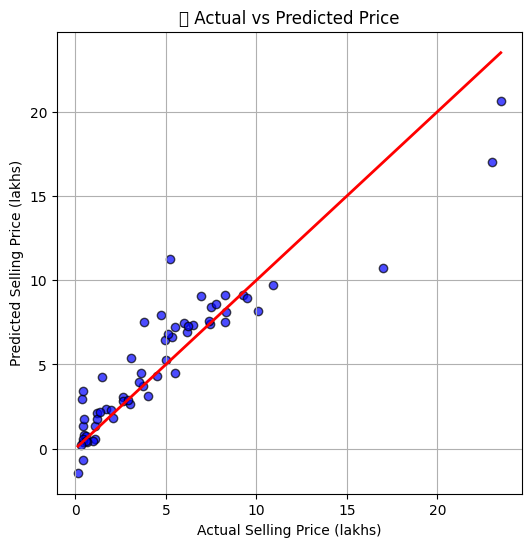

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Selling Price (lakhs)")
plt.ylabel("Predicted Selling Price (lakhs)")
plt.title("📈 Actual vs Predicted Price")
plt.grid(True)
plt.show()
